# Car Sales.

Consider the data on used cars (_ToyotaCorolla.csv_) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifcations. The goal is to predict the price of a used Toyota Corolla based on its specifcations.

__11.3.a.__ Fit a neural network model to the data. Use a single hidden layer with 2 nodes.

• Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.

• Use the scikit-learn transformer _MinMaxScaler()_ to scale the data to the range [0, 1]. Use separate transformer for the input and output data. To create the dummy variables, use the pandas function _pd.get_dummies()_.

Record the RMS error for the training data and the validation data. Repeat the process, changing the number of hidden layers and nodes to {single layer with 5 nodes}, {two layers, 5 nodes in each layer}.

__Answer:__

## Data Preprocessing

In [15]:
# load the data
import pandas as pd

car_df = pd.read_csv('ToyotaCorolla.csv')
# select the suggested variables
selected_var = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 
                'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 
                'Powered_Windows', 'Sport_Model', 'Tow_Bar']
car_df = car_df[selected_var]

In [16]:
# convert the categorical data into dummy variables
categorical_var = ['Fuel_Type']
car_df = pd.get_dummies(car_df, columns=['Fuel_Type'], drop_first=True)

# separate out predictors and response variables
X_df = car_df.drop(columns=['Price'])
Y_df = car_df[ ['Price'] ]

In [18]:
# normalize the data 
from sklearn.preprocessing import MinMaxScaler

scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()
X = scaleInput.fit_transform(X_df)
y = scaleOutput.fit_transform(Y_df)

In [20]:
# partition data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((861, 16), (575, 16), (861, 1), (575, 1))

__9.3.a.i.__ What happens to the RMS error for the training data as the number of layers and nodes increases?

### Single layer with 2 nodes

In [22]:
# train neural network with 2 hidden nodes
from sklearn.neural_network import MLPRegressor

car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=2, random_state=1,
             solver='lbfgs')

In [23]:
# RMSE for training set
print('Training data (2)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Training data (2)


NameError: name 'regressionSummary' is not defined

In [3]:
from sklearn.metrics import r2_score

# RMSE and R-squared for training set
print('Training data (2)')
y_actual_train = y_train.ravel()
y_pred_train = car_nnet.predict(X_train).ravel()
regressionSummary(y_pred_train, y_actual_train)
r_squared_train = r2_score(y_actual_train, y_pred_train)
print('R-squared:', r_squared_train)

# RMSE and R-squared for validation set
print('\nValidation data (2)')
y_actual_valid = y_valid.ravel()
y_pred_valid = car_nnet.predict(X_valid).ravel()
regressionSummary(y_pred_valid, y_actual_valid)
r_squared_valid = r2_score(y_actual_valid, y_pred_valid)
print('R-squared:', r_squared_valid)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual_valid, 'predicted': y_pred_valid}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()


Training data (2)


NameError: name 'y_train' is not defined

### Single layer with 5 nodes

Training data (5)

Regression statistics

                      Mean Error (ME) : 0.4100
       Root Mean Squared Error (RMSE) : 1035.9503
            Mean Absolute Error (MAE) : 785.5496
          Mean Percentage Error (MPE) : 0.0534
Mean Absolute Percentage Error (MAPE) : 7.6386

Validation data (5)

Regression statistics

                      Mean Error (ME) : -86.4744
       Root Mean Squared Error (RMSE) : 1143.4845
            Mean Absolute Error (MAE) : 859.6481
          Mean Percentage Error (MPE) : -1.0071
Mean Absolute Percentage Error (MAPE) : 8.5108


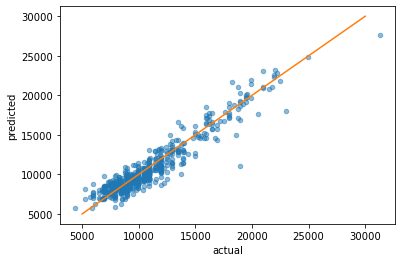

In [12]:
# train neural network with 5 hidden nodes
car_nnet = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

# RMSE for training set
print('Training data (5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

### Two layer with 5 nodes each

Training data (5, 5)

Regression statistics

                      Mean Error (ME) : -1.9756
       Root Mean Squared Error (RMSE) : 1084.3964
            Mean Absolute Error (MAE) : 805.6998
          Mean Percentage Error (MPE) : 0.0288
Mean Absolute Percentage Error (MAPE) : 7.7659

Validation data (5, 5)

Regression statistics

                      Mean Error (ME) : -84.4923
       Root Mean Squared Error (RMSE) : 1146.2892
            Mean Absolute Error (MAE) : 867.0769
          Mean Percentage Error (MPE) : -0.9083
Mean Absolute Percentage Error (MAPE) : 8.5001


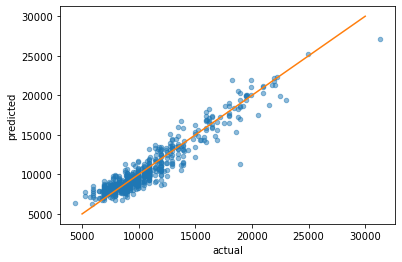

In [13]:
# train neural network with 2 layes with 5 hidden nodes each
car_nnet = MLPRegressor(hidden_layer_sizes=(5, 5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

# RMSE for training set
print('Training data (5, 5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5, 5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

ii. What happens to the RMS error for the validation data?

iii. Comment on the appropriate number of layers and nodes for this application

# Direct Mailing to Airline Customers.

East-West Airlines has entered into a partnership with the wireless phone company Telcon to sell the latter’s service via direct mail. The fle _EastWestAirlinesNN.csv_ contains a subset of a data sample of who has already received a test oﬀer. About 13% accepted.

You are asked to develop a model to classify East–West customers as to whether they purchase a wireless phone service contract (outcome variable Phone_Sale). This model will be used to classify additional customers.

__11.4.a.__ Run a neural net model on these data, using a single hidden layer with five nodes. Remember to first convert categorical variables into dummies and scale numerical predictor variables to a 0–1 (use the scikit-learn transformer <i>MinMaxScaler()</i>). Create a decile-wise lift chart for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.



In [14]:
# load the data
airline_df = pd.read_csv(DATA / 'EastWestAirlinesNN.csv')
airline_df.head(5)

,ID#,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,1.0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0


## Data Preprocessing

In [15]:
# drop missing values from the data
airline_df = pd.DataFrame.dropna(airline_df)
# check variable types
airline_df.dtypes

ID#                  float64
Topflight            float64
Balance              float64
Qual_miles           float64
cc1_miles?           float64
cc2_miles?           float64
cc3_miles?           float64
Bonus_miles          float64
Bonus_trans          float64
Flight_miles_12mo    float64
Flight_trans_12      float64
Online_12            float64
Email                float64
Club_member          float64
Any_cc_miles_12mo    float64
Phone_sale           float64
dtype: object

In [16]:
# Remove unnecessary variables
del airline_df['ID#']

airline_df.head()

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0


In [17]:
# prettify the variable names by removing characters and spaces in their names
airline_df.columns = [c.replace('?', '') for c in airline_df.columns]

In [18]:
# some categorical variables are read as float64, convert them to categorical variables
# airline_df['Topflight'] = airline_df['Topflight'].astype('category')
# airline_df['cc1_miles'] = airline_df['cc1_miles'].astype('category')
# airline_df['cc2_miles'] = airline_df['cc2_miles'].astype('category')
# airline_df['cc3_miles'] = airline_df['cc3_miles'].astype('category')
# airline_df['Email'] = airline_df['Email'].astype('category')
airline_df.dtypes

Topflight            float64
Balance              float64
Qual_miles           float64
cc1_miles            float64
cc2_miles            float64
cc3_miles            float64
Bonus_miles          float64
Bonus_trans          float64
Flight_miles_12mo    float64
Flight_trans_12      float64
Online_12            float64
Email                float64
Club_member          float64
Any_cc_miles_12mo    float64
Phone_sale           float64
dtype: object

In [19]:
# separate out the predictors and response variables
X_df = airline_df.drop(columns=['Phone_sale'])
Y_df = airline_df[ ['Phone_sale'] ]

In [20]:
# normalize the data 
scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()
X = scaleInput.fit_transform(X_df)
y = scaleOutput.fit_transform(Y_df)

In [21]:
# partition data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2991, 14), (1994, 14), (2991, 1), (1994, 1))

### Single hidden layer with 5 nodes

Training data (5)

Regression statistics

               Mean Error (ME) : -0.1177
Root Mean Squared Error (RMSE) : 0.3517
     Mean Absolute Error (MAE) : 0.1237

Validation data (5)

Regression statistics

               Mean Error (ME) : -0.1214
Root Mean Squared Error (RMSE) : 0.3734
     Mean Absolute Error (MAE) : 0.1394


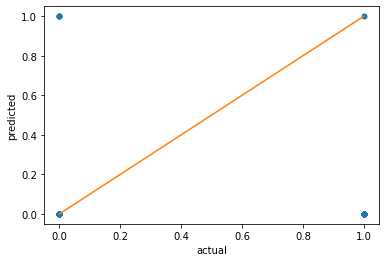

In [22]:
# train neural network with 5 hidden nodes
airline_nnet = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', 
                             max_iter=500, random_state=1)
airline_nnet.fit(X_train, y_train.ravel())

# RMSE for training set
print('Training data (5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([airline_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([airline_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([0, 1], [0, 1], color='C1')
plt.show()

### Decile-wise lift chart training set

PETER - I was not able to do lift charts. I think we will need to ask PeterG.

Confusion Matrix (Accuracy 0.8763)

       Prediction
Actual    0    1
     0 2595    9
     1  361   26


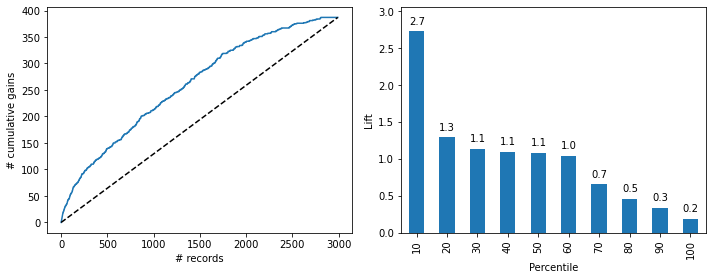

In [23]:
from dmba import classificationSummary, gainsChart, liftChart

classificationSummary(y_train, airline_nnet.predict(X_train))

nnet_proba = airline_nnet.predict_proba(X_train)
result = pd.DataFrame({'actual': y_train.ravel(), 
                       'p(0)': [p[0] for p in nnet_proba],
                       'p(1)': [p[1] for p in nnet_proba],
                      })

df = result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.tight_layout()
plt.show()

### Decile-wise lift chart validation set

PETER - I was not able to do lift charts. I think we will need to ask PeterG.

__11.4.b.__ Comment on the diﬀerence between the training and validation lift charts.

Confusion Matrix (Accuracy 0.8606)

       Prediction
Actual    0    1
     0 1708   18
     1  260    8


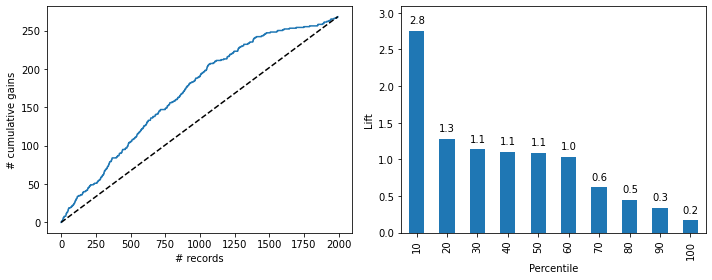

In [24]:
classificationSummary(y_valid, airline_nnet.predict(X_valid))

nnet_proba = airline_nnet.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid.ravel(), 
                       'p(0)': [p[0] for p in nnet_proba],
                       'p(1)': [p[1] for p in nnet_proba],
                      })

df = result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.tight_layout()
plt.show()

__11.4.c.__ Run a second neural net model on the data, this time setting the number of hidden nodes to 1. Comment now on the diﬀerence between this model and the model you ran earlier, and how overftting might have aﬀected results.

### Single hidden layer with 1 node

Training data (1)

Regression statistics

               Mean Error (ME) : -0.1294
Root Mean Squared Error (RMSE) : 0.3597
     Mean Absolute Error (MAE) : 0.1294

Validation data (1)

Regression statistics

               Mean Error (ME) : -0.1344
Root Mean Squared Error (RMSE) : 0.3666
     Mean Absolute Error (MAE) : 0.1344


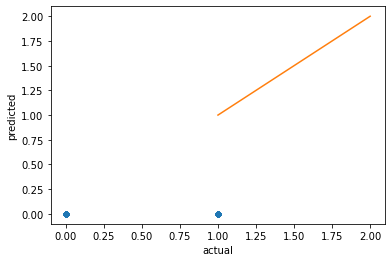

In [25]:
# train neural network with 1 hidden node
airline_nnet = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1)
airline_nnet.fit(X_train, y_train.ravel())

# RMSE for training set
print('Training data (1)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([airline_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (1)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([airline_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([1, 2], [1, 2], color='C1')
plt.show()